# Understanding Descriptive Statistics

Import the necessary libraries here:

In [182]:
# Libraries

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [183]:
# your code here

dice_number = [1,2,3,4,5,6]
rolling_time = []
results = []
frequencies = []

for i in range(10):
    rolling_number = str(i+1)
    frequency = 1
    result = random.choice(dice_number)
    rolling_time.append(rolling_number)
    results.append(result)
    frequencies.append(frequency)

df = pd.DataFrame(list(zip(rolling_time, results, frequencies)),columns =['Rolling_time', 'Results', 'Frequencies'])
df

,Rolling_time,Results,Frequencies
0,1,3,1
1,2,5,1
2,3,6,1
3,4,6,1
4,5,1,1
5,6,3,1
6,7,4,1
7,8,4,1
8,9,5,1
9,10,6,1


#### 2.- Plot the results sorted by value.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rolling_time  10 non-null     object
 1   Results       10 non-null     int64 
 2   Frequencies   10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


,Rolling_time,Results,Frequencies
4,5,1,1
0,1,3,1
5,6,3,1
6,7,4,1
7,8,4,1
1,2,5,1
8,9,5,1
2,3,6,1
3,4,6,1
9,10,6,1


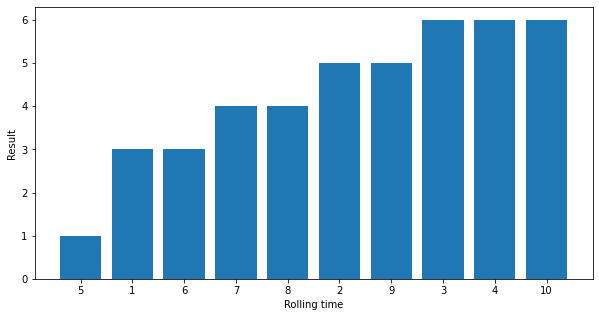

In [196]:
# your code here


df = df.sort_values('Results')
df.info()

fig = plt.figure(figsize = (10, 5))
plt.bar(df['Rolling_time'],df['Results'])
plt.xlabel('Rolling time')
plt.ylabel('Result')
df

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [197]:
# your code here

data = df[['Results','Frequencies']]
data = data.groupby(by=data['Results'],as_index = False).sum()
data = data.sort_values('Frequencies',ascending = False)
print(data)

   Results  Frequencies
4        6            3
1        3            2
2        4            2
3        5            2
0        1            1


(array([1., 0., 0., 0., 2., 0., 2., 0., 2., 3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

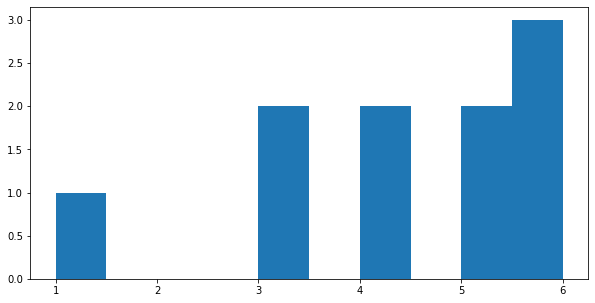

In [198]:
fig = plt.figure(figsize = (10, 5))
#plt.bar(data['Results'],data['Frequencies'])
#plt.xlabel('Rolling time')
#plt.ylabel('Result')

plt.hist(df['Results'])

In [199]:
"""
one shows the individual result of each experiment and the other shows how many times the same 
experiment gave the same result.
"""

'\none shows the individual result of each experiment and the other shows how many times the same \nexperiment gave the same result.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [200]:
# your code here

def mean(a):
    b = sum(a)
    c = len(a)
    
    x = b/c
    
    return x

In [201]:
mean(df['Results'])

4.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [202]:
# your code here

def mean_2(a):
    b = a.value_counts()
    b = list(b)
    b = sum(b)

    
    c = a.sum()
    
    x = c/b
    return x

In [203]:
mean_2(df['Results'])

4.3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [230]:
# your code here

def median(a):
    a= list(a)
    b = len(a)

    if b%2 == 0:
        c = int((len(a)/2)+1)
        d = int((len(a)/2))
        x = (a[c-1] + a[d-1])/2
        
    else:
        x = a[len(a)/2]
        
    return x

In [231]:
median(df['Results'])

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [232]:
df

,Rolling_time,Results,Frequencies
4,5,1,1
0,1,3,1
5,6,3,1
6,7,4,1
7,8,4,1
1,2,5,1
8,9,5,1
2,3,6,1
3,4,6,1
9,10,6,1


In [237]:
# your code here

def quartile(a):
    a = list(a)
    b = len(a)    
    q1 = a[round((b+1)/4)]
    q2 = median(a)
    q3 = a[round((b+1)*(3/4))]
    
    return q1, q2, q3

In [238]:
quartile(df['Results'])

(4, 4.5, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [239]:
df = pd.read_csv('./data/roll_the_dice_hundred.csv')
df = df.sort_values("value")
df = df.astype({"roll":"string"})
df

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


Text(0, 0.5, 'Result')

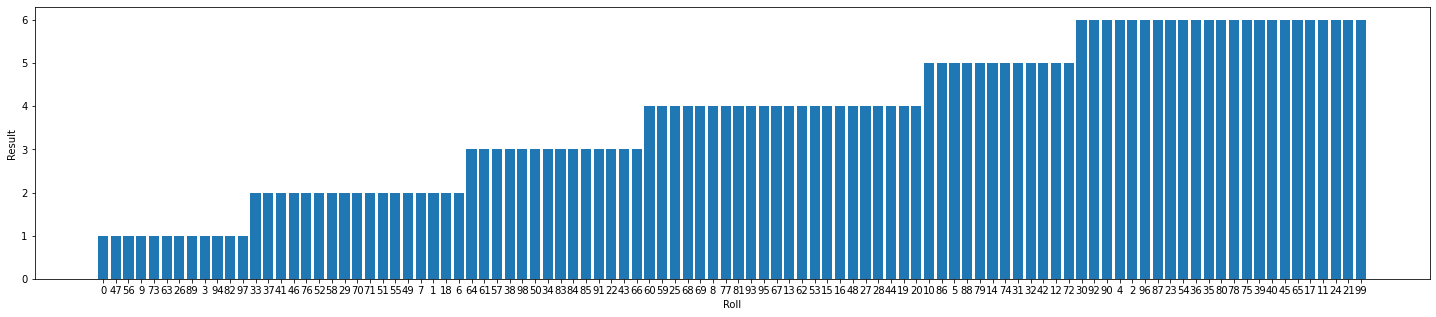

In [240]:
fig = plt.figure(figsize = (25, 5))
plt.bar(df['roll'],df['value'])
plt.xlabel('Roll')
plt.ylabel('Result')

In [241]:
"""
A staggered graph
"""

'\nA staggered graph\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [242]:
# your code here

mean(df["value"])

3.74

In [243]:
df["value"].mean()

3.74

#### 3.- Now, calculate the frequency distribution.


In [244]:
# your code here

df["value"].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

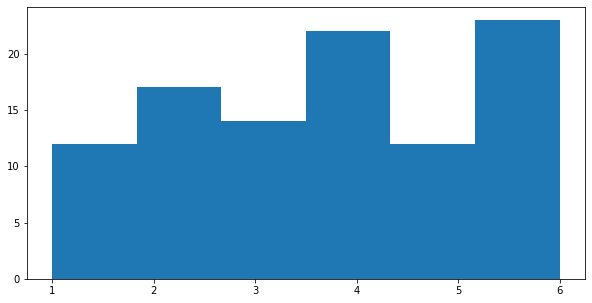

In [245]:
# your code here

fig = plt.figure(figsize = (10, 5))

plt.hist(df['value'], bins= 6)

In [246]:
"""
Most of the result in the right side where the result of the roll is a high number but 
the majority seems to have a similar frequency
"""

'\nMost of the result in the right side where the result of the roll is a high number but \nthe majority seems to have a similar frequency\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [247]:
# your code here

df = pd.read_csv('./data/roll_the_dice_thousand.csv')
df

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


(array([175., 167., 175., 168., 149., 166.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

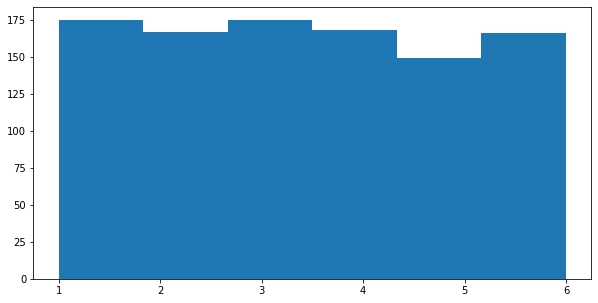

In [248]:
fig = plt.figure(figsize = (10, 5))

plt.hist(df['value'], bins= 6)

In [249]:
df["value"].value_counts()

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

In [250]:
"""
the numbers seems to have a very similar frequency
"""

'\nthe numbers seems to have a very similar frequency\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [251]:
# your code here

df_pop_age = pd.read_csv('./data/ages_population.csv')
df_pop_age

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [252]:
df_pop_age["observation"].value_counts()

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
73.0     1
82.0     1
70.0     1
71.0     1
69.0     1
Name: observation, Length: 72, dtype: int64

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

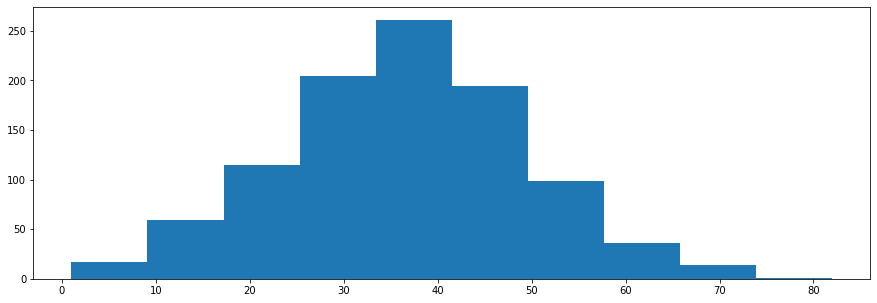

In [253]:
fig = plt.figure(figsize = (15, 5))

plt.hist(df_pop_age["observation"])

In [254]:
"""Could be a mean of about 35 and std of about +/- 15"""

'Could be a mean of about 35 and std of about +/- 15'

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc54f62a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc54f62a670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc54f508ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc54f62ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc54f62aee0>],
 'means': []}

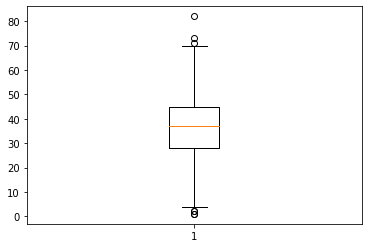

In [255]:
plt.boxplot(df_pop_age["observation"])

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [256]:
# your code here

mean = df_pop_age["observation"].mean()
std = df_pop_age["observation"].std()

In [257]:
print(mean)
print(std)

36.56
12.816499625976762


In [258]:
"""
Yes, the values are more or less what we guessed
"""

'\nYes, the values are more or less what we guessed\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [259]:
# your code here

df_pop_age2 = pd.read_csv('./data/ages_population2.csv')
df_pop_age2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [260]:
df_pop_age2["observation"].value_counts()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
19.0      3
35.0      3
36.0      2
Name: observation, dtype: int64

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <BarContainer object of 10 artists>)

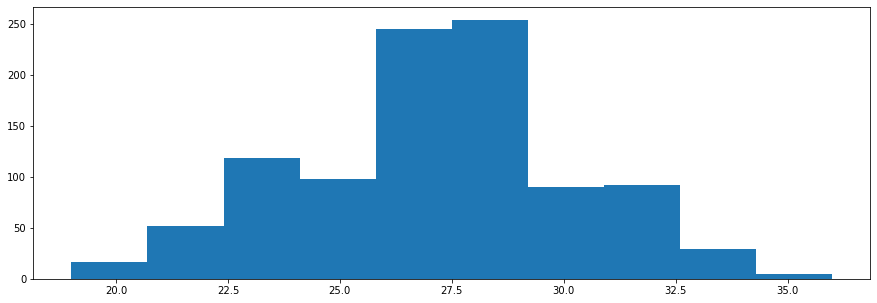

In [261]:
fig = plt.figure(figsize = (15, 5))

plt.hist(df_pop_age2["observation"])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [262]:
"""
It seems that the distribution has moved towards younger observations compared to the first dataset
"""

'\nIt seems that the distribution has moved towards younger observations compared to the first dataset\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [263]:
# your code here

mean = df_pop_age2["observation"].mean()
std = df_pop_age2["observation"].std()

print(mean)
print(std)

27.155
2.969813932689186


In [264]:
"""
The mean is lower than in the previous dataset and it seems that there is also less deviation around the mean
"""

'\nThe mean is lower than in the previous dataset and it seems that there is also less deviation around the mean\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [265]:
# your code here

df_pop_age3 = pd.read_csv('./data/ages_population3.csv')
df_pop_age3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [266]:
df_pop_age3["observation"].value_counts()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
8.0      1
9.0      1
1.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

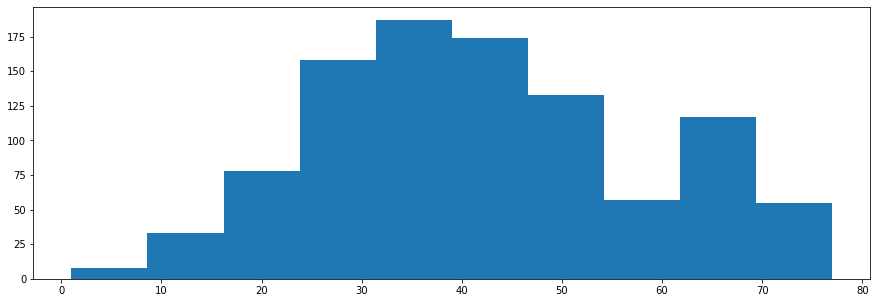

In [267]:
fig = plt.figure(figsize = (15, 5))

plt.hist(df_pop_age3["observation"])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [268]:
# your code here

mean = df_pop_age3["observation"].mean()
std = df_pop_age3["observation"].std()

print(mean)
print(std)

41.989
16.144705959865934


In [269]:
"""
We can see that now the mean is around 41 years old but with a bigger std. This is possibly the result of having more
people of 60 to 70 years old.
"""

'\nWe can see that now the mean is around 41 years old but with a bigger std. This is possibly the result of having more\npeople of 60 to 70 years old.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [270]:
# your code here

df_pop_age3 = df_pop_age3.sort_values('observation')
df_pop_age3['observation']

263     1.0
924     2.0
415     2.0
639     4.0
698     4.0
       ... 
76     75.0
323    75.0
12     76.0
937    77.0
218    77.0
Name: observation, Length: 1000, dtype: float64

In [271]:
df_pop_age3.reset_index(drop=True)

,observation
0,1.0
1,2.0
2,2.0
3,4.0
4,4.0
...,...
995,75.0
996,75.0
997,76.0
998,77.0


In [272]:
df_pop_age3.loc[499]

observation    45.0
Name: 499, dtype: float64

In [273]:
median(df_pop_age3['observation'])

40.0

In [274]:
quartile(df_pop_age3['observation'])

(30.0, 40.0, 53.0)

In [275]:
df_pop_age3['observation'].min()

1.0

In [276]:
df_pop_age3['observation'].median()

40.0

In [279]:
"""
50% of all the observations are between 30 and 53 years old.
"""

'\n50% of all the observations are between 30 and 53 years old.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [280]:
# your code here

np.percentile(df_pop_age3['observation'],[25,30,40,50,60,70, 75])

array([30., 32., 36., 40., 45., 50., 53.])

In [ ]:
"""
The observations seems to be perfectly distributed between the 25 and 75 percentile.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""